4.1 Dataset

For this project I will be using "The Movies Dataset" from Kaggle. 

The dataset comprises metadata for approximately 45,000 movies, including information such as cast, crew, director, keywords, budget, and country. Additionally, it includes ratings from around 270,000 users, totaling 26,000,000 movie ratings on a scale from 1 to 5.

For this project, two main files were used: 'movies_metadata.csv,' representing metadata for all movies, and 'ratings_small.csv,' containing rating information from a subset of users.

To gain insights into the overall rating distribution, the 'ratings_small.csv' file was analyzed using the matplotlib library. The resulting graph [Figure 1] indicated that 4.0 was the most common rating, followed by 3.0 and 5.0. The least common ratings were 0.5, with 1.5 and 2.5 following suit. The overall statistics, as obtained from the df.describe() method in the pandas library, are shown in Overall Statistics.

In [33]:
#Libraries for data manipulation
import sys
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab as pl
from mlxtend.frequent_patterns import apriori, association_rules
from fuzzywuzzy import process 
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import pickle

## Loading the Data

In [34]:
# Load the 'ratings_small.csv' file
ratings_df = pd.read_csv('C:/Users/Owner/Desktop/LHL-final-project/uncleaned_csv/ratings_small.csv')

# Load the 'movies_metadata.csv' file
movies_df  = pd.read_csv('C:/Users/Owner/Desktop/LHL-final-project/uncleaned_csv/movies_metadata.csv', low_memory=False)

In [35]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [36]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [37]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [38]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

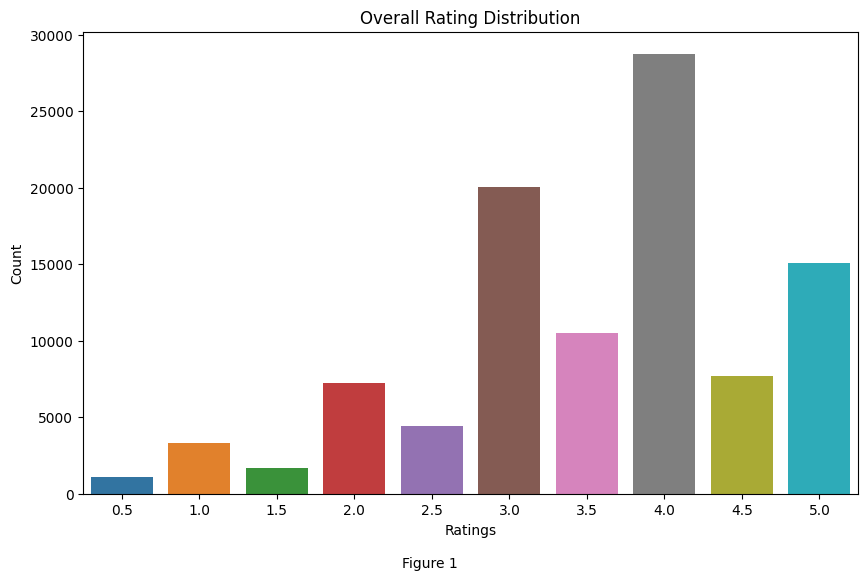

Overall Statistics:
count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [39]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=ratings_df, x='rating')
labels = (ratings_df['rating'].value_counts().sort_index())
plt.title('Overall Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.figtext(0.5, 0.005, 'Figure 1', ha='right', va='top')
plt.show()

# Display overall statistics
print("Overall Statistics:")
print(ratings_df['rating'].describe())


## Clean the Data

In [40]:
clean_df = movies_df['title'].isna()

In [41]:
movies_df = movies_df.loc[clean_df == False]

In [42]:
# Convert 'id' column in df_metadata to int64
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')


In [43]:
# Merge the two dataframes on 'movieId' and 'id'
df = pd.merge(ratings_df, movies_df[['id', 'title']], left_on='movieId', right_on='id', how='inner')

# Display the merged dataframe
df.head()

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,4,1371,4.0,949810302,1371,Rocky III
2,7,1371,3.0,851869160,1371,Rocky III
3,19,1371,4.0,855193404,1371,Rocky III
4,21,1371,3.0,853852263,1371,Rocky III


In [44]:
df.drop(['timestamp', 'id'], axis=1, inplace=True)

In [45]:
df = df.drop_duplicates(['userId','title'])

In [46]:
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

In [47]:
df_pivot = df_pivot.astype('int64')

In [48]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)
df_pivot.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Method 1: Apriori & K-means Clustering 


In [49]:
from mlxtend.frequent_patterns import apriori

df_pivot = df_pivot.astype(bool)

frequent_itemset = apriori(df_pivot, min_support=0.07, use_colnames=True)

In [50]:
frequent_itemset.head()

,support,itemsets
0,0.129657,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.298063,(48 Hrs.)
3,0.292101,(5 Card Stud)
4,0.093890,(A Brief History of Time)


In [51]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

In [52]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(20,000 Leagues Under the Sea)",(48 Hrs.),0.129657,0.298063,0.076006,0.586207,1.966724,0.037360,1.696349,0.564766
1,(48 Hrs.),"(20,000 Leagues Under the Sea)",0.298063,0.129657,0.076006,0.255000,1.966724,0.037360,1.168245,0.700262
2,"(20,000 Leagues Under the Sea)",(A Nightmare on Elm Street),0.129657,0.266766,0.081967,0.632184,2.369807,0.047379,1.993480,0.664134
3,(A Nightmare on Elm Street),"(20,000 Leagues Under the Sea)",0.266766,0.129657,0.081967,0.307263,2.369807,0.047379,1.256382,0.788322
4,"(20,000 Leagues Under the Sea)",(Back to the Future Part II),0.129657,0.210134,0.077496,0.597701,2.844379,0.050251,1.963381,0.745028


In [53]:
#Sort by Lift
df_lift = rules.sort_values(by=['lift'], ascending=False)

In [65]:
df_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
70961,(On Guard),"(Muxmäuschenstill, The Garden of Eden)",0.087928,0.099851,0.070045,0.796610,7.977991,0.061265,4.425733,0.958976
70956,"(Muxmäuschenstill, The Garden of Eden)",(On Guard),0.099851,0.087928,0.070045,0.701493,7.977991,0.061265,3.055440,0.971678
197232,"(Big Fish, Rope)","(Psycho, All the Way Boys)",0.092399,0.095380,0.070045,0.758065,7.947833,0.061232,3.739096,0.963176
197237,"(Psycho, All the Way Boys)","(Big Fish, Rope)",0.095380,0.092399,0.070045,0.734375,7.947833,0.061232,3.416849,0.966350
2541172,"(Cockles and Muscles, 48 Hrs., A Nightmare on ...","(Sissi, Rain Man, Monsoon Wedding, The Hours, ...",0.093890,0.098361,0.071535,0.761905,7.746032,0.062300,3.786885,0.961143
2541025,"(Sissi, Rain Man, Monsoon Wedding, The Hours, ...","(Cockles and Muscles, 48 Hrs., A Nightmare on ...",0.098361,0.093890,0.071535,0.727273,7.746032,0.062300,3.322404,0.965909
197235,"(Rope, Psycho)","(Big Fish, All the Way Boys)",0.098361,0.093890,0.070045,0.712121,7.584656,0.060810,3.147541,0.962863
197234,"(Big Fish, All the Way Boys)","(Rope, Psycho)",0.093890,0.098361,0.070045,0.746032,7.584656,0.060810,3.550205,0.958112
2541081,"(Sissi, Cockles and Muscles, 48 Hrs., A Nightm...","(Rain Man, Back to the Future Part II, The Hou...",0.090909,0.104322,0.071535,0.786885,7.542857,0.062051,4.202797,0.954167
2541116,"(Rain Man, Back to the Future Part II, The Hou...","(Sissi, Cockles and Muscles, 48 Hrs., A Nightm...",0.104322,0.090909,0.071535,0.685714,7.542857,0.062051,2.892562,0.968455


In [101]:
pickle.dump(df_lift, open('apriori_df.pk1', 'wb'))

In [100]:
df_lift = df_lift.applymap(lambda x: 1 if x else 0)

In [69]:
df_MIB = df_lift[df_lift['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Men in Black II')]
df_MIB = df_MIB[df_MIB['lift'] > 2]
df_MIB.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63399,(Men in Black II),"(Nostalgia, Terminator 3: Rise of the Machines)",0.33383,0.080477,0.077496,0.232143,2.884590,0.050631,1.197518,0.980726
56667,(Men in Black II),"(Jarhead, Sleepless in Seattle)",0.33383,0.077496,0.073025,0.218750,2.822716,0.047155,1.180805,0.969319
63405,(Men in Black II),"(Nostalgia, The 39 Steps)",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865
380666,(Men in Black II),"(Young and Innocent, The Talented Mr. Ripley, ...",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865
1167106,(Men in Black II),"(Young and Innocent, The Talented Mr. Ripley, ...",0.33383,0.080477,0.073025,0.218750,2.718171,0.046160,1.176990,0.948865


In [70]:
movies = df_MIB['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

In [71]:
movie_list[0:10]

['Nostalgia',
 'Terminator 3: Rise of the Machines',
 'Jarhead',
 'Sleepless in Seattle',
 'The 39 Steps',
 'Young and Innocent',
 'The Talented Mr. Ripley',
 'Point Break',
 'Once Were Warriors',
 'The Thomas Crown Affair']

## K-means Clustering

In [76]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
df  = pd.read_csv('C:/Users/Owner/Desktop/LHL-final-project/uncleaned_csv/movies_metadata.csv', low_memory=False)

In [78]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [79]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [80]:
df_numeric.isnull().sum()

budget            0
popularity        5
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
dtype: int64

In [81]:
df_numeric.dropna(inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_12196\2939391043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


In [82]:
df_numeric['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [83]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [84]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [85]:
df_numeric.shape

(12178, 7)

# Normalize data
#### Normalize the data with MinMax scaling provided by sklearn

In [86]:
from sklearn import preprocessing

In [87]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [88]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


# Apply K-Means Clustering

In [89]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

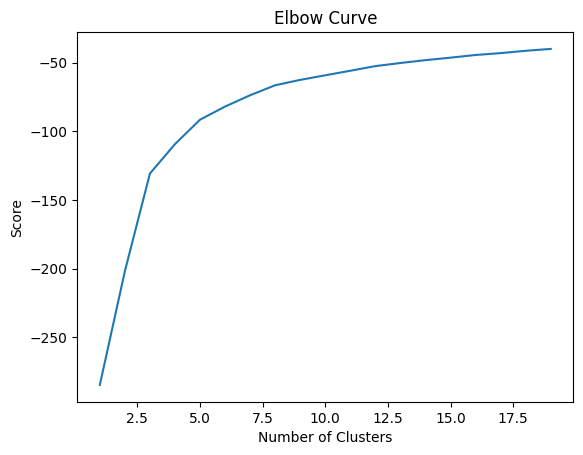

In [90]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The Elbow Point is around cluster 5 and we will be using k=5 to interpret the cluster result. 

In [91]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5, n_init=10)

In [92]:
len(kmeans.labels_)

12178

In [93]:
df_numeric['cluster'] = kmeans.labels_
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,1
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


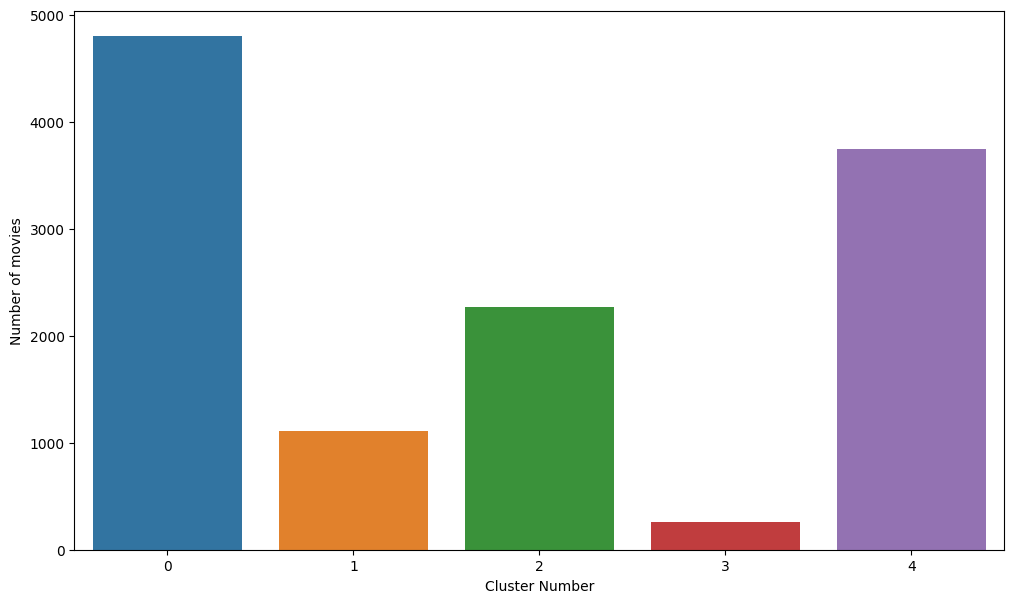

In [94]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

We can see that cluster 3 is the largest and cluster 2 has the smallest number of movies

In [95]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

In [96]:
size_array

[4797, 1111, 2271, 257, 3742]

In [97]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
23359,250000000,26.058586,747862775.0,131.0,7.5,6155.0,X-Men: Days of Future Past,3
10069,113000000,13.165421,850000000.0,140.0,7.1,4200.0,Star Wars: Episode III - Revenge of the Sith,3
11927,150000000,21.3643,938212738.0,138.0,7.4,5633.0,Harry Potter and the Order of the Phoenix,3
44842,260000000,39.186819,604942143.0,149.0,6.2,1440.0,Transformers: The Last Knight,3
12625,185000000,12.577266,786636033.0,122.0,5.7,2558.0,Indiana Jones and the Kingdom of the Crystal S...,3


The smallest cluster will have higher budget, popularity, revenue, runtime, vote_average, and vote_count.

In [98]:
pickle.dump(df_numeric, open('df_numeric.pk1', 'wb'))

In [99]:
pickle.load(open('df_numeric.pk1', 'rb'))

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,1
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0
...,...,...,...,...,...,...,...,...
45353,0,2.302582,0.0,92.0,5.9,33.0,Frankenstein Created Woman,0
45373,0,9.222308,0.0,83.0,6.0,38.0,Take Me,0
45380,0,5.667067,0.0,83.0,6.2,37.0,The Incredible Jessica James,0
45437,0,20.82178,0.0,4.0,8.3,146.0,In a Heartbeat,4
